# Intro Predictive Policing
Input data using pandas from DataSF on Public Safety.

# Exercise 1
Input data and basic statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [3]:
# Control your working directory and the files in the folder.
# Load the data from the relative path, so already inside the folder.
os.getcwdb()
os.listdir(os.getcwdb())

[b'.DS_Store',
 b'Pandas Best Practices.ipynb',
 b'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv',
 b'.ipynb_checkpoints',
 b'F1 Exercises.ipynb']

# Basic Statistics
* Total number of crimes
* List of different crime categories
* List the number of crimes in each category

In [13]:
data.dtypes

PdId                                                          int64
IncidntNum                                                    int64
Incident Code                                                 int64
Category                                                     object
Descript                                                     object
DayOfWeek                                                    object
Date                                                         object
Time                                                         object
PdDistrict                                                   object
Resolution                                                   object
Address                                                      object
X                                                           float64
Y                                                           float64
location                                                     object
SF Find Neighborhoods 2 2                       

In [40]:
print("There was commited a total of " + str(data.shape[0]) + " crimes.")

There was commited a total of 2129525 crimes.


In [41]:
print("There were " + str(data['Category'].nunique()) + " different crime categories")

There were 37 different crime categories


In [42]:
# Counting the unique incidents grouped by each crime category
data.groupby('Category')['PdId'].nunique()

Category
ARSON                            3875
ASSAULT                        167042
BAD CHECKS                        924
BRIBERY                           796
BURGLARY                        91067
DISORDERLY CONDUCT               9932
DRIVING UNDER THE INFLUENCE      5652
DRUG/NARCOTIC                  117821
DRUNKENNESS                      9760
EMBEZZLEMENT                     2984
EXTORTION                         729
FORGERY/COUNTERFEITING          22995
FRAUD                           41348
GAMBLING                          343
KIDNAPPING                       4282
LARCENY/THEFT                  477975
LIQUOR LAWS                      2840
LOITERING                        2402
MISSING PERSON                  44268
NON-CRIMINAL                   236928
OTHER OFFENSES                 301874
PORNOGRAPHY/OBSCENE MAT            57
PROSTITUTION                    16501
RECOVERED VEHICLE                8688
ROBBERY                         54467
SECONDARY CODES                 22378
SEX

# Exercise 2 - visualization of data

Visualize a bar chart of the amount of crimes per category sorted from highest to lowest.

In [54]:
#Make a variable grouped by category, counting each row in each category and sorting this in a descending order.
# The variable has an index (categories) and values (count) that can be called.
CountCategory = data.groupby('Category').count().iloc[:,0].sort_values(ascending=False)

In [55]:
CountCategory

Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON                            3875
EMB

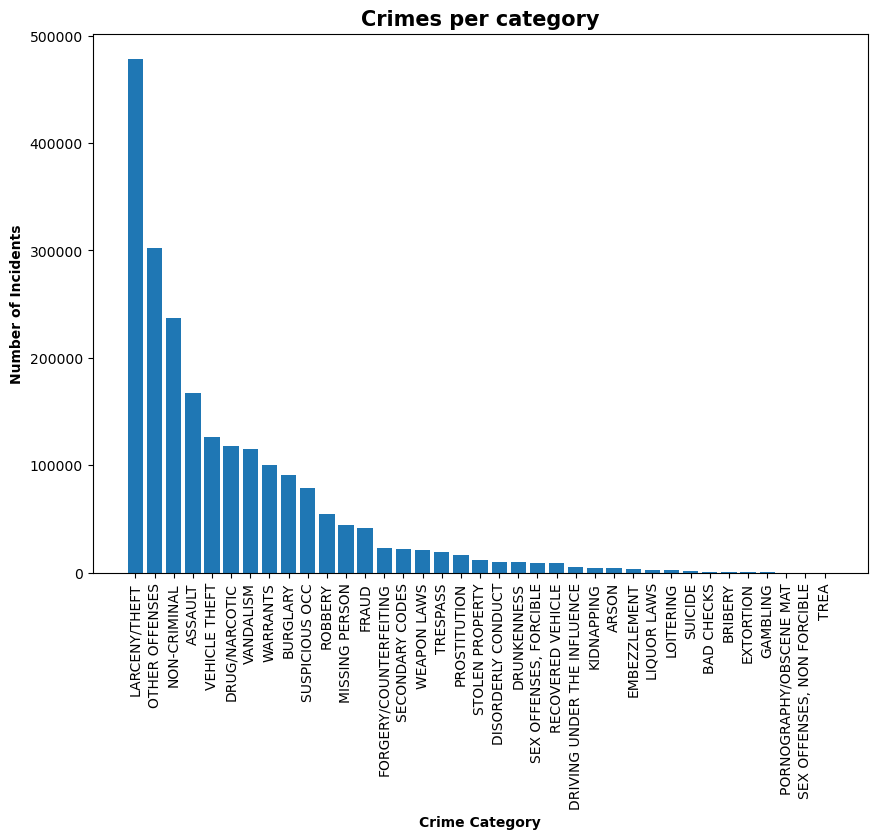

In [56]:
# Figure Size

fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot

plt.bar(CountCategory.index, CountCategory.values)

# Axis labels
plt.xlabel('Crime Category', fontweight ='bold', fontsize = 10)
plt.ylabel('Number of Incidents', fontweight ='bold', fontsize = 10)
plt.title("Crimes per category", fontweight = 'bold', fontsize = 15)
plt.xticks(rotation=90)

# Show Plot

plt.show()

# Exercise 3 Temporal patterns


In [34]:
# The year with most crimes
# Convert Date to a datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Create a subset with number of crimes grouped by each year, sorted
crimes_per_year = data.groupby(data["Date"].dt.year)['PdId'].count().sort_values()
print(crimes_per_year)
# Use idxmax and max to get the index and value of the subset.
print(str(crimes_per_year.idxmax()) + " was the year with the most crimes, with " + str(crimes_per_year.max()))

# Use idxmin and min to get the index and value of the subset.
print(str(crimes_per_year.idxmin()) + " was the year with the least crimes, with " + str(crimes_per_year.min()))

# As the data only runs to May 2018, 2018 is not valid to say it has the least crimes.
# Ask for a good way to slize and dize for the second largest value.

Date
2018     45059
2011    126713
2010    127758
2007    131771
2006    131856
2009    134309
2008    135242
2012    135464
2005    137048
2004    142054
2003    142803
2014    144844
2016    145994
2013    147664
2017    149487
2015    151459
Name: PdId, dtype: int64
2015 was the year with the most crimes, with 151459
2018 was the year with the least crimes, with 45059


IndexError: index 126713 is out of bounds for axis 0 with size 16

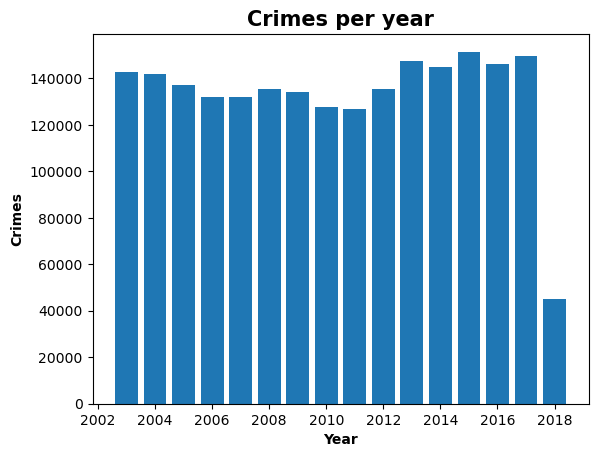

In [37]:
# Horizontal Bar Plot of crimes per year

plt.bar(crimes_per_year.index, crimes_per_year.values,)

# Axis labels
plt.xlabel('Year', fontweight ='bold', fontsize = 10)
plt.ylabel('Crimes', fontweight ='bold', fontsize = 10)
plt.title("Crimes per year", fontweight = 'bold', fontsize = 15)
# plt.xticks(rotation=45)

# Show Plot

plt.show()

In [38]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [57]:
categorizedYearly = {}
for category in focuscrimes:
    dict = {}
    for year in range(2003, 2018):
        # filtering data to count the crimes in the specific category per year
        temp = data.loc[data['Date'].dt.year == year]
        count = temp.loc[data['Category'] == category].shape[0]
        dict[year] = count
    # creating dataframe and adding it to dictionary labeled with the crime category
    df = pd.DataFrame(dict.items(), columns=['Year', 'Occurences'])
    categorizedYearly[category] = df
categorizedYearly

{'DRUNKENNESS':     Year  Occurences
 0   2003         657
 1   2004         592
 2   2005         628
 3   2006         695
 4   2007         665
 5   2008         705
 6   2009         801
 7   2010         701
 8   2011         646
 9   2012         640
 10  2013         951
 11  2014         617
 12  2015         576
 13  2016         465
 14  2017         337,
 'WEAPON LAWS':     Year  Occurences
 0   2003        1196
 1   2004        1174
 2   2005        1289
 3   2006        1246
 4   2007        1245
 5   2008        1357
 6   2009        1367
 7   2010        1243
 8   2011        1184
 9   2012        1358
 10  2013        1435
 11  2014        1478
 12  2015        1590
 13  2016        1591
 14  2017        1644,
 'VEHICLE THEFT':     Year  Occurences
 0   2003       15276
 1   2004       17816
 2   2005       18103
 3   2006        7263
 4   2007        6444
 5   2008        6042
 6   2009        5170
 7   2010        4336
 8   2011        4743
 9   2012        6174
 10  

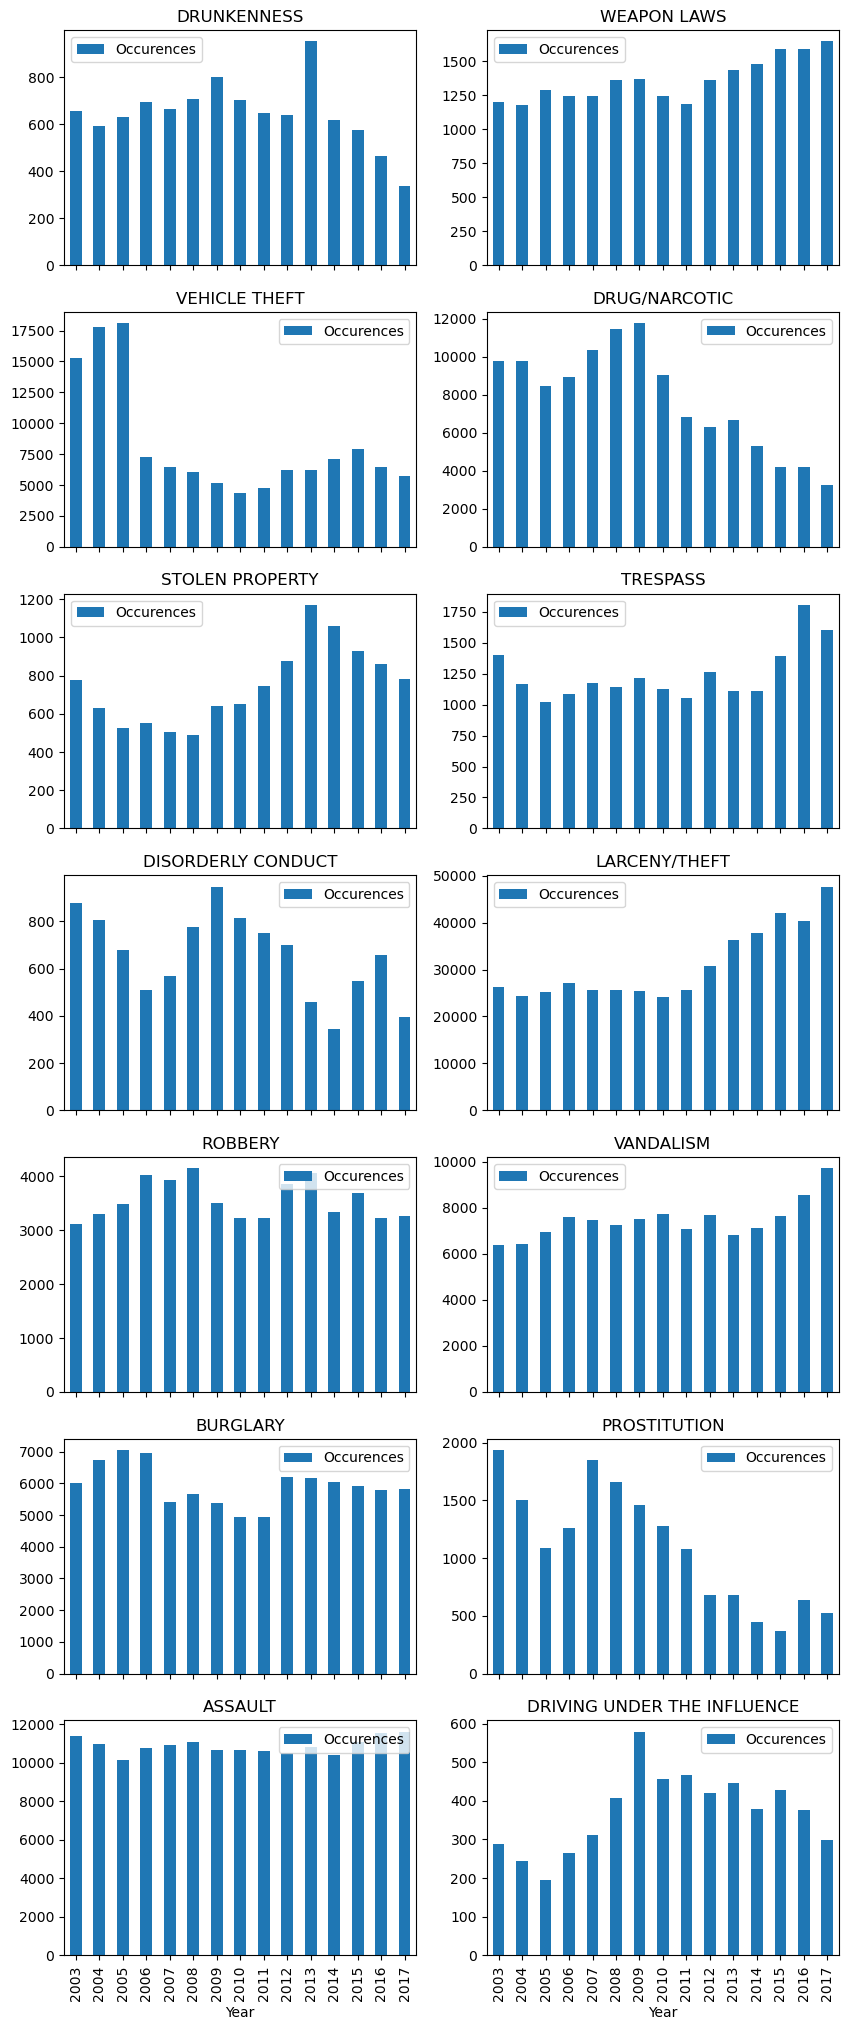

In [58]:
# Use subplots with a for loop to create bar plot for each chosen category.
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
i = 0
for crime, df in categorizedYearly.items():
    df.plot.bar(ax=axes[i//2, i%2], x='Year', y='Occurences', title=crime, figsize=(10,25))
    i += 1